y = m*x +c

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("homeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,680000
4,4000,5.0,8,725000
5,4100,6.0,8,810000


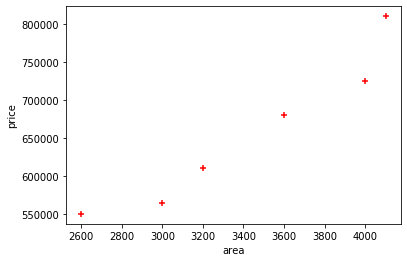

In [3]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [4]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [5]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [6]:
reg = linear_model.LinearRegression()
model =reg.fit(new_df,price)
#reg.fit(df[['area']],df.price)

In [7]:
reg.predict(df[['area']])

array([533664.38356164, 587979.45205479, 615136.98630137, 669452.05479452,
       723767.12328767])

In [8]:
reg.coef_

array([135.78767123])

In [9]:
reg.intercept_

180616.43835616432

In [10]:
#y= m*x + c
135.78767123*3000 + 180616.43835616432

587979.4520461643

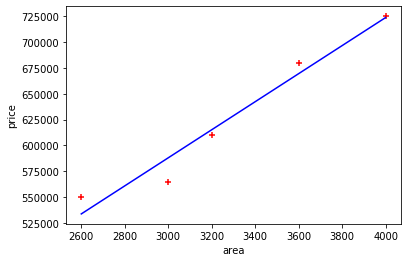

In [11]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df['area'],reg.predict(df[['area']]),color ='b')

In [12]:
model.score(new_df,price)

0.9584301138199486

In [13]:
area_df = pd.read_csv("areas.csv")
area_df.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [14]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [15]:
model.score(area_df,p)

1.0

In [16]:
area_df['prices'] = p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [ ]:
area_df.to_csv("areas.csv")